### **1. Load Data**

In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import pickle
from collections import defaultdict
import re
import sys
import os
os.environ['KERAS_BACKEND']='theano' # Why theano why not
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline

In [0]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano' # Why theano why not
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline



from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
food_df = pd.read_csv(r'C:\Users\liewm\Documents\BT4221 Big Data\Project\food_df.csv')
food_df = food_df.drop('Unnamed: 0', axis=1)
food_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score Class,Text_processed
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,buy several vitality can dog food product find...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,product arrive label jumbo salt peanutsthe pea...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,confection century light pillowy citrus gelati...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,look secret ingredient robitussin believe find...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,great taffy great price wide assortment yummy ...


In [0]:
#Create a dictionary containing all the reviews based on the product ID : groupby reviews based on productId
food_rev=pd.DataFrame()
food_df['Text_processed']=food_df['Text_processed'].astype(str)

In [0]:
food_rev['ProductId']=food_df['ProductId']
food_rev['Text_processed']=food_df['Text_processed']
food_rev

,ProductId,Text_processed
0,B001E4KFG0,buy several vitality can dog food product find...
1,B00813GRG4,product arrive label jumbo salt peanutsthe pea...
2,B000LQOCH0,confection century light pillowy citrus gelati...
3,B000UA0QIQ,look secret ingredient robitussin believe find...
4,B006K2ZZ7K,great taffy great price wide assortment yummy ...
...,...,...
393926,B001EO7N10,great sesame chickenthis good well resturant e...
393927,B003S1WTCU,be disappointed flavor chocolate note weak mil...
393928,B004I613EE,star small give training session try train dog...
393929,B004I613EE,good treat train rewarding dog good grooming l...


In [0]:
food_rev['Text'] = food_rev.groupby(['ProductId'])['Text_processed'].transform(lambda x: ' '.join(x))


In [0]:
food_rev=food_rev[['ProductId', 'Text']].drop_duplicates()
food_rev

,ProductId,Text
0,B001E4KFG0,buy several vitality can dog food product find...
1,B00813GRG4,product arrive label jumbo salt peanutsthe pea...
2,B000LQOCH0,confection century light pillowy citrus gelati...
3,B000UA0QIQ,look secret ingredient robitussin believe find...
4,B006K2ZZ7K,great taffy great price wide assortment yummy ...
...,...,...
393920,B000H7K114,love tea discover pleasure chai attend yoga cl...
393921,B001EO7N10,foodie use lot chinese spice powder daily cook...
393927,B003S1WTCU,be disappointed flavor chocolate note weak mil...
393928,B004I613EE,star small give training session try train dog...


In [0]:
#helpfulness numerator and denominator 
help_ratings = pd.DataFrame(food_df.groupby(['ProductId'], as_index = True , sort = True)['HelpfulnessNumerator','HelpfulnessDenominator'].apply(lambda x: x.sum()))
help_ratings

,HelpfulnessNumerator,HelpfulnessDenominator
ProductId,,
0006641040,112,125
141278509X,1,1
2734888454,1,1
2841233731,0,0
7800648702,0,0
...,...,...
B009SF0TN6,0,0
B009SR4OQ2,1,1
B009UOFU20,0,0


In [0]:
score_ratings = pd.DataFrame(food_df.groupby(['ProductId'], as_index = True , sort = True)['Score'].apply(lambda x: int(round(x.mean()))))
score_ratings

,Score
ProductId,
0006641040,4
141278509X,5
2734888454,4
2841233731,5
7800648702,4
...,...
B009SF0TN6,5
B009SR4OQ2,5
B009UOFU20,1


In [0]:
NNinput = pd.merge(food_rev, help_ratings, on='ProductId', how='inner')
NNinput = pd.merge(NNinput, score_ratings, on='ProductId', how='inner')
NNinput
#NNinput.loc[:,'Prd_Id'] = prod_list
#NNinput.columns

,ProductId,Text,HelpfulnessNumerator,HelpfulnessDenominator,Score
0,B001E4KFG0,buy several vitality can dog food product find...,1,1,5
1,B00813GRG4,product arrive label jumbo salt peanutsthe pea...,0,0,1
2,B000LQOCH0,confection century light pillowy citrus gelati...,1,1,4
3,B000UA0QIQ,look secret ingredient robitussin believe find...,3,3,2
4,B006K2ZZ7K,great taffy great price wide assortment yummy ...,0,0,5
...,...,...,...,...,...
67619,B000H7K114,love tea discover pleasure chai attend yoga cl...,0,0,5
67620,B001EO7N10,foodie use lot chinese spice powder daily cook...,5,5,4
67621,B003S1WTCU,be disappointed flavor chocolate note weak mil...,0,0,2
67622,B004I613EE,star small give training session try train dog...,3,3,5


In [0]:
#Compute helpfulness percentage 
NNinput['HelpfulnessPercentage'] = NNinput['HelpfulnessNumerator'] / NNinput['HelpfulnessDenominator'] 
#Compute recommend or not 
NNinput['Recommend?'] = np.where(NNinput['Score'] > 3, 1 , 0)

In [0]:
NNinput['HelpfulnessPercentage']=NNinput['HelpfulnessPercentage'].fillna(0.0)
NNinput=NNinput.drop(columns=['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score'])

In [0]:
NNinput

,ProductId,Text,HelpfulnessPercentage,Recommend?
0,B001E4KFG0,buy several vitality can dog food product find...,1.0,1
1,B00813GRG4,product arrive label jumbo salt peanutsthe pea...,0.0,0
2,B000LQOCH0,confection century light pillowy citrus gelati...,1.0,1
3,B000UA0QIQ,look secret ingredient robitussin believe find...,1.0,0
4,B006K2ZZ7K,great taffy great price wide assortment yummy ...,0.0,1
...,...,...,...,...
67619,B000H7K114,love tea discover pleasure chai attend yoga cl...,0.0,1
67620,B001EO7N10,foodie use lot chinese spice powder daily cook...,1.0,1
67621,B003S1WTCU,be disappointed flavor chocolate note weak mil...,0.0,0
67622,B004I613EE,star small give training session try train dog...,1.0,1


In [0]:
NNinput=NNinput.drop(columns=['ProductId'])
NNinput

,Text,HelpfulnessPercentage,Recommend?
0,buy several vitality can dog food product find...,1.0,1
1,product arrive label jumbo salt peanutsthe pea...,0.0,0
2,confection century light pillowy citrus gelati...,1.0,1
3,look secret ingredient robitussin believe find...,1.0,0
4,great taffy great price wide assortment yummy ...,0.0,1
...,...,...,...
67619,love tea discover pleasure chai attend yoga cl...,0.0,1
67620,foodie use lot chinese spice powder daily cook...,1.0,1
67621,be disappointed flavor chocolate note weak mil...,0.0,0
67622,star small give training session try train dog...,1.0,1


In [0]:
# set parameters:
#max_features = 1000 # max number of words in the corpus
#maxlen = 400 # max number of words in the review
batch_size = 32
embedding_dims = 50 # emddeding for each word
filters = 250
kernel_size = 3 #size of the 1D conv. layer
hidden_dims = 250 # number of dimensions
epochs = 2

# set parameters:
max_features = 1000 # max number of words in the corpus
maxlen = 400 # max number of words in the review

MAX_SEQUENCE_LENGTH = 5000 # MAX NUMBER OF WORDS IN THE CORPUS 
MAX_NB_WORDS = 50000 #MAX NUMBER OF WORDS IN THE REVIEW 
#EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [0]:
texts=NNinput.Text
MAX_NB_WORDS=1000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))


Number of Unique Tokens 159178


In [0]:
max_features=len(tokenizer.word_index)+1

In [0]:
max_features

159179

In [0]:
print('The longest string is: ',int(NNinput['Text'].str.encode(encoding='utf-8').str.len().max()))

The longest string is:  222963


In [0]:
NNinput.iloc[:, 1:2]

,HelpfulnessPercentage
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
67619,0.0
67620,1.0
67621,0.0
67622,1.0


In [0]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack, csr_matrix
MAX_SEQUENCE_LENGTH=1000
Xtvec = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
traindex=NNinput.index
X = hstack([csr_matrix(NNinput.iloc[traindex,1:2].values),Xtvec[0:traindex.shape[0]]])
y = NNinput.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


In [0]:
!pip install utils

In [0]:
X_test

<13525x1001 sparse matrix of type '<class 'numpy.float64'>'
	with 1587102 stored elements in Compressed Sparse Row format>

# 1 Dimensional CNN
- Input : Word Embedding, Helpfulness Percentage 
- Output : Recommended or not 

In [0]:
print('Build model...')
model = Sequential()

#MAX_SEQUENCE_LENGTH=1000
#embedding_dims=50
#max_features=159179

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=MAX_SEQUENCE_LENGTH+1))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           validation_data=(x_test, y_test))

epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,\
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])




Build model...
Train on 43279 samples, validate on 10820 samples
Epoch 1/5
43279/43279 [==============================] - 1853s 43ms/step - loss: 0.4710 - acc: 0.8078 - val_loss: 0.4021 - val_acc: 0.8350
Epoch 2/5
43279/43279 [==============================] - 1790s 41ms/step - loss: 0.3746 - acc: 0.8393 - val_loss: 0.3468 - val_acc: 0.8547
Epoch 3/5
43279/43279 [==============================] - 1812s 42ms/step - loss: 0.3410 - acc: 0.8550 - val_loss: 0.3298 - val_acc: 0.8619
Epoch 4/5
43279/43279 [==============================] - 1820s 42ms/step - loss: 0.3261 - acc: 0.8604 - val_loss: 0.3298 - val_acc: 0.8624
Epoch 5/5
43279/43279 [==============================] - 1808s 42ms/step - loss: 0.3155 - acc: 0.8660 - val_loss: 0.3280 - val_acc: 0.8618


Training Accuracy: 87.07%

Testing Accuracy: 85.83%



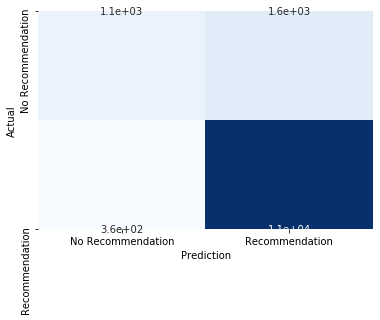

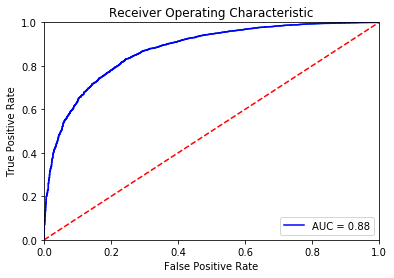

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import utils 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# We are evaluating the model from accuracy rate.
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

# Results - Confusion Matrix
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Recommendation', 'Recommendation'], yticklabels=['No Recommendation', 'Recommendation'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

# Results - ROC Curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
roc_auc = auc(FPR, TPR)
plt.plot(FPR, TPR)
#Plot ROC

plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

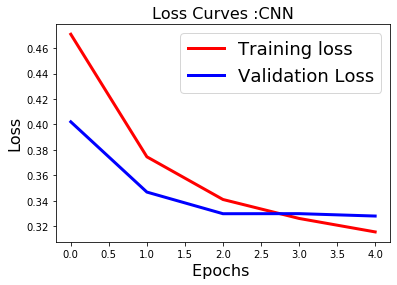

In [0]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

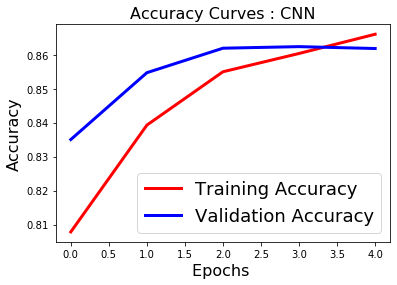

In [0]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : CNN',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()

In [0]:
c_matrix

array([[ 1057,  1553],
       [  364, 10551]], dtype=int64)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1001, 50)          7958950   
_________________________________________________________________
dropout (Dropout)            (None, 1001, 50)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 999, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0         
__________